In [44]:
import requests
import time
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Kraken API endpoint
url = "https://api.kraken.com/0/public/OHLC"

# Parameters
pair = "XXBTZUSD"  # BTC/USD pair
interval = 240        # 1440-minute intervals (1day)

# Parameters
short_term_window = 7
long_term_window = 25

In [46]:

# Calculate the Unix timestamp for the start of the week
today = datetime.utcnow().replace(hour=0, minute=0, second=0, microsecond=0)
since = int(time.mktime(today.timetuple()) - timedelta(days=long_term_window).total_seconds())


# Make the API request
response = requests.get(url, params={"pair": pair, "interval": interval, "since": since})
data = response.json()

# Extract and print the hourly prices
if data["error"]:
    print("Error:", data["error"])
else:
    ohlc_data = data["result"][pair] #ohlc stands for open, high, low, close
    for entry in ohlc_data:
        timestamp = datetime.utcfromtimestamp(entry[0])
        open_price = entry[1]
        high_price = entry[2]
        low_price = entry[3]
        close_price = entry[4]
        print(f"Time: {timestamp}, Open: {open_price}, High: {high_price}, Low: {low_price}, Close: {close_price}")


Time: 2025-02-18 04:00:00, Open: 96186.1, High: 96234.6, Low: 95301.0, Close: 95478.1
Time: 2025-02-18 08:00:00, Open: 95478.1, High: 95833.0, Low: 95124.1, Close: 95629.1
Time: 2025-02-18 12:00:00, Open: 95629.1, High: 96650.9, Low: 95176.9, Close: 95504.1
Time: 2025-02-18 16:00:00, Open: 95504.1, High: 95600.0, Low: 93388.7, Close: 94066.6
Time: 2025-02-18 20:00:00, Open: 94066.7, High: 95600.0, Low: 93733.1, Close: 95600.0
Time: 2025-02-19 00:00:00, Open: 95600.0, High: 95831.3, Low: 94996.8, Close: 95639.2
Time: 2025-02-19 04:00:00, Open: 95639.3, High: 95781.0, Low: 95075.4, Close: 95670.6
Time: 2025-02-19 08:00:00, Open: 95670.6, High: 96367.5, Low: 95598.9, Close: 96354.0
Time: 2025-02-19 12:00:00, Open: 96354.0, High: 96682.9, Low: 95578.6, Close: 95911.0
Time: 2025-02-19 16:00:00, Open: 95911.1, High: 96465.8, Low: 95442.1, Close: 96120.8
Time: 2025-02-19 20:00:00, Open: 96120.9, High: 96875.0, Low: 96050.0, Close: 96625.7
Time: 2025-02-20 00:00:00, Open: 96625.7, High: 97291.

In [47]:

needed = []
for entry in ohlc_data:
    timestamp = datetime.utcfromtimestamp(entry[0])
    open_price = entry[1]
    high_price = entry[2]
    low_price = entry[3]
    close_price = entry[4]
    needed.append([timestamp, open_price, high_price, low_price, close_price])


def CreateDF(data):
    df = pd.DataFrame(data, columns=["Time", "Open", "High", "Low", "Close"])
    # Convert the timestamp to datetime
    df["Time"] = pd.to_datetime(df["Time"], unit='s')
    df.set_index("Time", inplace=True)
    
    # Convert price columns to floats
    df["Open"] = df["Open"].astype(float)
    df["High"] = df["High"].astype(float)
    df["Low"] = df["Low"].astype(float)
    df["Close"] = df["Close"].astype(float)
    
    return df



dateframe = CreateDF(needed)
print(dateframe)

                        Open     High      Low    Close
Time                                                   
2025-02-18 04:00:00  96186.1  96234.6  95301.0  95478.1
2025-02-18 08:00:00  95478.1  95833.0  95124.1  95629.1
2025-02-18 12:00:00  95629.1  96650.9  95176.9  95504.1
2025-02-18 16:00:00  95504.1  95600.0  93388.7  94066.6
2025-02-18 20:00:00  94066.7  95600.0  93733.1  95600.0
...                      ...      ...      ...      ...
2025-03-14 16:00:00  84727.6  84947.9  83985.0  84589.8
2025-03-14 20:00:00  84591.1  84591.1  83750.0  83997.6
2025-03-15 00:00:00  83997.7  84659.4  83997.6  84500.7
2025-03-15 04:00:00  84500.8  84559.4  83802.9  83838.9
2025-03-15 08:00:00  83839.0  84095.8  83666.9  84049.0

[152 rows x 4 columns]


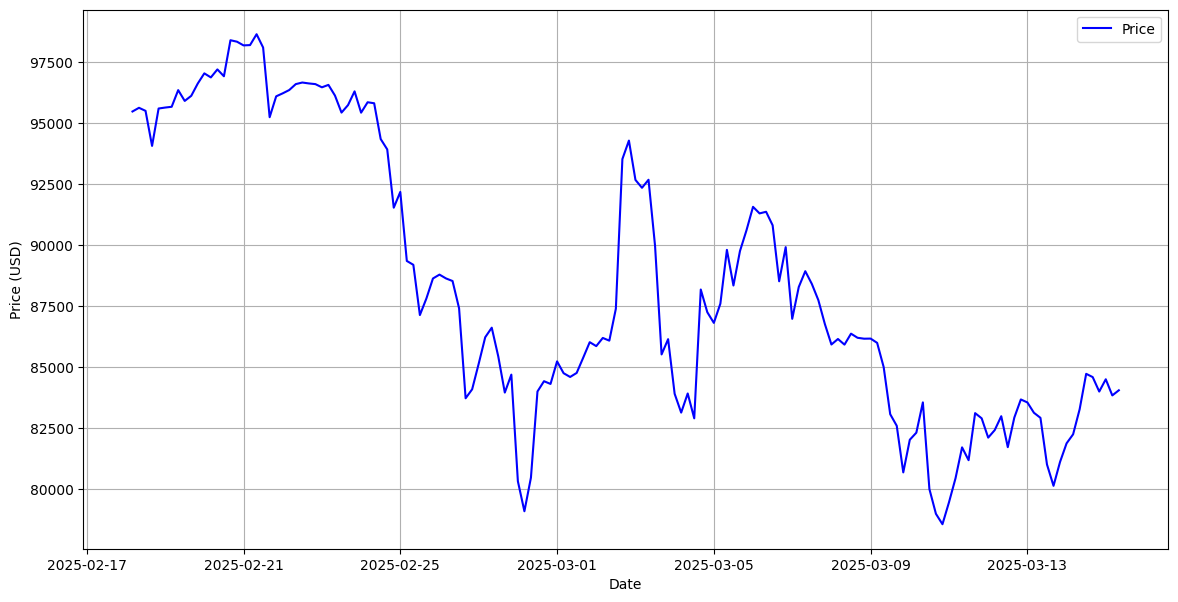

In [48]:
def graph_data(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Price', color='blue')    
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

graph_data(dateframe)

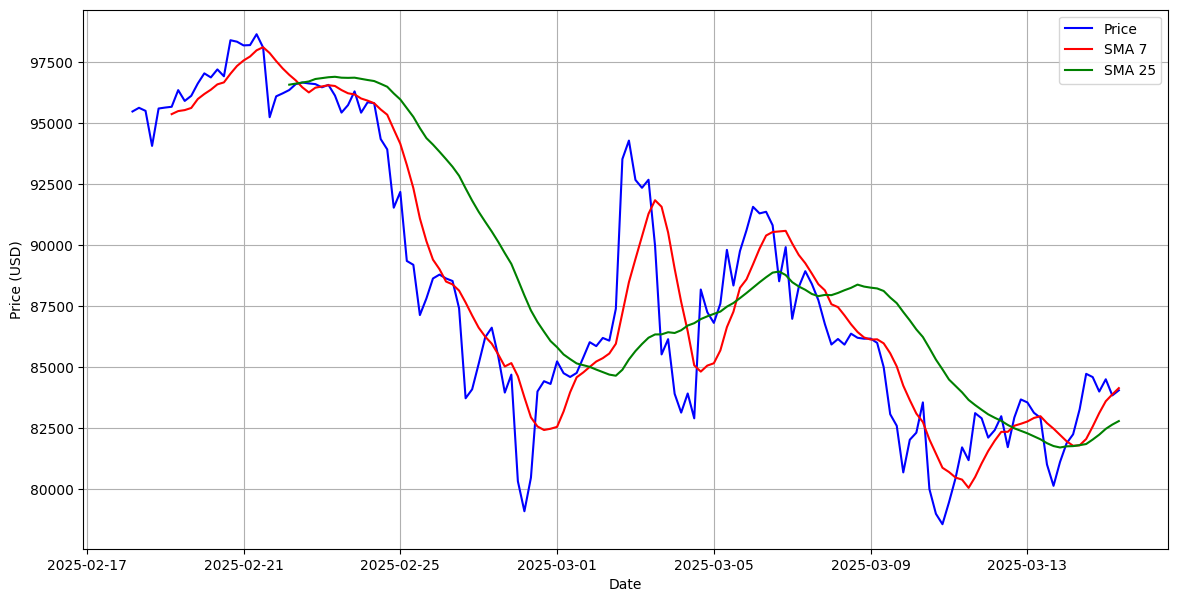

In [ ]:
def calculate_sma(df, window): 
    return df['Close'].rolling(window=window).mean()

short_momentum = calculate_sma(dateframe, short_term_window)
long_momentum = calculate_sma(dateframe, long_term_window)

def plot_sma(df, short_momentum, long_momentum):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Price', color='blue')
    plt.plot(df.index, short_momentum, label=f'SMA {short_term_window}', color='red')
    plt.plot(df.index, long_momentum, label=f'SMA {long_term_window}', color='green')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

plot_sma(dateframe, short_momentum, long_momentum)

